In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfx = pd.read_csv('https://raw.githubusercontent.com/kislay960/Data-Science-Practice/master/weightedX.csv')
dfy = pd.read_csv('https://raw.githubusercontent.com/kislay960/Data-Science-Practice/master/weightedY.csv')

In [3]:
x,y = dfx.values,dfy.values

In [4]:
x.shape,y.shape

((99, 1), (99, 1))

In [5]:
x = (x-x.mean())/x.std()

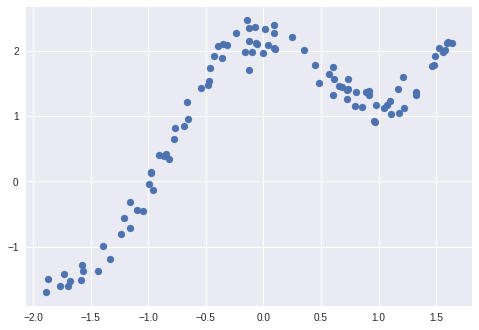

In [7]:
plt.style.use('seaborn')
plt.scatter(x,y)
plt.show()

In [17]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    for i in range(M):
        xi = X[i]
        x  = query_point
        W[i,i] =  np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [18]:
X = np.mat(x)
Y = np.mat(y)
M = X.shape[0]
W = getW(-1,X,100)
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [30]:
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

In [31]:
theta,pred = predict(X,Y,1.0,1.0)

In [32]:
theta,pred

(matrix([[0.14069504],
         [1.45348191]]), matrix([[1.59417694]]))

In [33]:
def plotPrediction(tau):
  X_test = np.linspace(-2,2,20)
  Y_test = []
  for xq in X_test:
    theta,pred = predict(X,Y,xq,tau)
    Y_test.append(pred[0][0])
  Y_test = np.array(Y_test)
  XO = np.array(X)
  YO = np.array(Y)
  plt.title("Tau/Bandwidth Param %.2f"%tau)
  plt.scatter(XO,YO)
  plt.scatter(X_test,Y_test,color='red')
  plt.show()

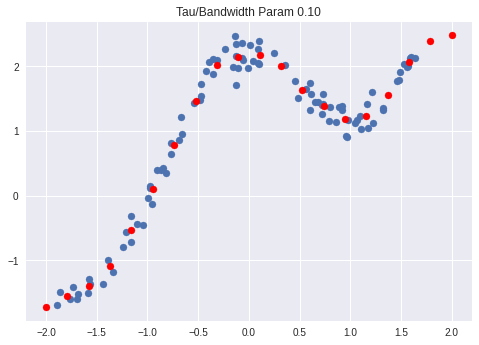

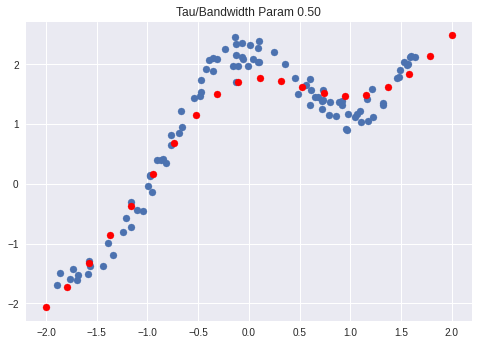

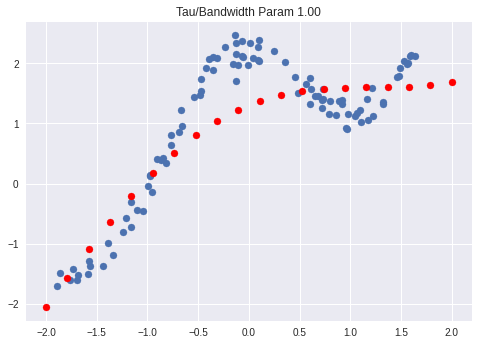

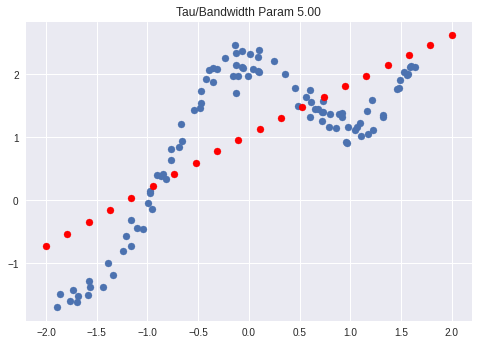

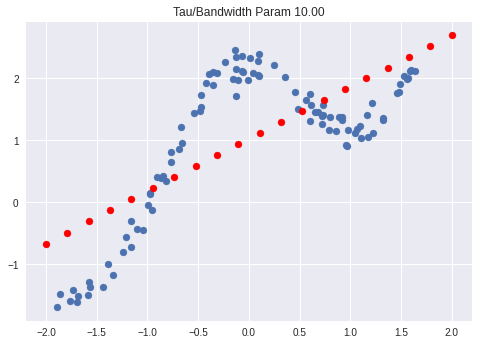

In [34]:
taus = [0.1,0.5,1,5,10]
for tau in taus:
  plotPrediction(tau)